In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import seaborn as sns
import time

In [4]:
df = pd.read_csv("./input/jdt.csv")

In [5]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,7,2003/10/10 16:10,1,1,3,0.581676,0.065669,0.021729,690.333333,1,6,36,0.666667,3709,1752.666667,3709,1
1,13,2002/5/14 7:42,1,1,1,0.000000,0.002985,0.008955,670.000000,0,3,0,1.000000,13391,7983.500000,13391,0
2,14,2002/5/13 15:48,1,2,2,0.000000,0.000000,0.000000,34.500000,0,1,7,1.000000,1508,1508.000000,1508,1
3,16,2002/4/5 8:48,1,1,3,0.000000,0.000000,0.000000,0.000000,0,1,458,0.666667,12804,8025.500000,12804,0
4,28,2001/8/24 15:14,1,37,429,0.622239,0.217704,0.266461,170.533800,0,1,835,0.018648,6003,6003.000000,6003,0


In [6]:
# ~expとn~を削除
df["xexp"]  = ((df["exp"] + df["rexp"] + df["sexp"])/3)
df["nx"] = ((df["ns"] + df["nm"] )/2)
df = df.ix[:,[0,1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15, 17, 18 ,16]]
df

X = df.iloc[:, :-1]
dropFeatures = ["transactionid","la", "exp", "rexp", "sexp", "commitdate", "ndev", "npt", "ns", "nm"]
X.drop(dropFeatures, axis =1, inplace=True)
y = df.iloc[:, 18]

from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#標準化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64, 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
start = time.time()
lr.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")
y_p_lr = lr.predict(X_test)



print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_lr))
print ("ロジスティック回帰での正答率", accuracy_score(y_test, y_p_lr))

elapsed_time:0.06975102424621582[sec]
ロジスティック回帰の混合行列 [[9046   28]
 [1515   27]]
ロジスティック回帰での正答率 0.8546533534287868


/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

start = time.time()
svm.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")
y_p_svm = svm.predict(X_test)
# 正答率を算出
print('SVMでの正答率', accuracy_score(y_test, y_p_svm))
print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_svm))

elapsed_time:5.583479166030884[sec]
SVMでの正答率 0.8547475508666165
ロジスティック回帰の混合行列 [[9074    0]
 [1542    0]]


elapsed_time:0.056732892990112305[sec]
knnの混合行列 [[8845  229]
 [1414  128]]
knnでの正答率 0.8452336096458176


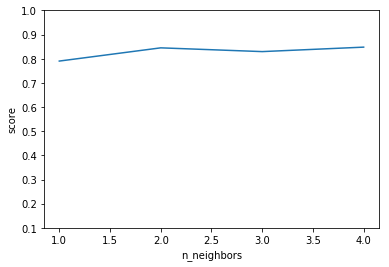

In [9]:
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []
for k in range(1, 5):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    Y_pred = knc.predict(X_test)
    score = knc.score(X_test, y_test)
    list_nn.append(k)
    list_score.append(score)

#プロット
plt.ylim(0.1, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)


knc = KNeighborsClassifier(n_neighbors=2)
start = time.time()
knc.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")
Y_pred = knc.predict(X_test)
score = knc.score(X_test, y_test)
print("knnの混合行列", confusion_matrix(y_test, Y_pred))
print ("knnでの正答率", accuracy_score(y_test, Y_pred))

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

Using TensorFlow backend.


In [ ]:
# NN
import numpy as np
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier


def bug_model(activation="relu", optimizer="adam", out_dim=100):
    dl_model = Sequential()
    dl_model.add(Dense(out_dim, input_dim=8, init='uniform', activation=activation))
    dl_model.add(Dense(out_dim, init='uniform', activation='relu'))
    dl_model.add(Dense(1, init='uniform', activation='sigmoid'))
    dl_model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return dl_model
    
activation = ["relu", "sigmoid"]
optimizer = ["adam", "adagrad"]
out_dim = [100, 200]
nb_epoch = [5, 10, 100]
batch_size = [5, 10, 100]
    





# dl_model.fit(X_train, y_train, nb_epoch=200, batch_size=10)
dl_model = KerasClassifier(build_fn=bug_model, verbose=0)
param_grid = dict(activation=activation, 
                  optimizer=optimizer, 
                  out_dim=out_dim, 
                  nb_epoch=nb_epoch, 
                  batch_size=batch_size)
grid = GridSearchCV(estimator=dl_model, param_grid=param_grid)

start = time.time()
grid_result = grid.fit(X_train, y_train)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

print (grid_result.best_score_)
print (grid_result.best_params_)




# scores = dl_model.evaluate(X_test, y_test)

# print("DLでの正答率",round(scores[1],2))

/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/Users/hatorikoudai/.pyenv/versions/anaconda3-5.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, act

In [1]:
# CNN

from __future__ import print_function
 
from keras.models import Model
from keras.utils import np_utils
import numpy as np

import keras 
from keras.callbacks import ReduceLROnPlateau
      
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
  
nb_epochs = 200
nb_classes = len(np.unique(y_test))
batch_size = min(X_train.shape[0]/10, 16)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

print(X_train.__class__.__name__)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean)/(X_train_std)

X_test = (X_test - X_train_mean)/(X_train_std)
X_train = X_train.reshape(X_train.shape + (1,1,))
X_test = X_test.reshape(X_test.shape + (1,1,))

x = keras.layers.Input(X_train.shape[1:])
#    drop_out = Dropout(0.2)(x)
conv1 = keras.layers.Conv2D(128, 8, 1, border_mode='same')(x)
conv1 = keras.layers.normalization.BatchNormalization()(conv1)
conv1 = keras.layers.Activation('relu')(conv1)

#    drop_out = Dropout(0.2)(conv1)
conv2 = keras.layers.Conv2D(256, 5, 1, border_mode='same')(conv1)
conv2 = keras.layers.normalization.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

#    drop_out = Dropout(0.2)(conv2)
conv3 = keras.layers.Conv2D(128, 3, 1, border_mode='same')(conv2)
conv3 = keras.layers.normalization.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

full = keras.layers.pooling.GlobalAveragePooling2D()(conv3)    
out = keras.layers.Dense(nb_classes, activation='softmax')(full)


model = Model(input=x, output=out)

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=50, min_lr=0.0001) 

start = time.time()
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
          verbose=1, validation_data=(X_test, Y_test), callbacks = [reduce_lr])
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")
#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_acc'])


Using TensorFlow backend.


NameError: name 'y_test' is not defined

In [13]:
#RNN

import numpy as np


from sklearn import datasets
from sklearn.model_selection import train_test_split

from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from sklearn import preprocessing

def build_multilayer_perceptron():
#     """多層パーセプトロンモデルを構築"""
    rnn_model = Sequential()
    rnn_model.add(Dense(16, input_shape=(13, )))
    rnn_model.add(Activation('relu'))
    rnn_model.add(Dense(2))
    rnn_model.add(Activation('softmax'))
    return rnn_model


# モデル構築
rnn_model = build_multilayer_perceptron()
rnn_model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

# モデル訓練
start = time.time()
rnn_model.fit(X_train, y_train, nb_epoch=200, batch_size=3, verbose=1)
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

# モデル評価
loss, accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy = {:.3f}".format(accuracy))

print ("RNNでの正答率", round(accuracy,2))

/Users/hatorikoudai/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:32: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ValueError: Error when checking input: expected dense_6_input to have shape (13,) but got array with shape (8,)